In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import plotly.express as px

from splice.splice import SPLICE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [93]:
data = np.load(
        r"C:\Users\Harris_Lab\Projects\SPLICE\data\mnist\mnist_rotated_shared-digit_missing.npz"
    )

# X = torch.Tensor(data["view1"][:50000]).to(device)
# Y = torch.Tensor(data["view2"][:50000]).to(device)
# X_val = torch.Tensor(data["view1"][50000:60000]).to(device)
# Y_val = torch.Tensor(data["view2"][50000:60000]).to(device)
a_test = torch.Tensor(data["view1"][60000:]).to(device)
b_test = torch.Tensor(data["view2"][60000:]).to(device)
angles_test = data["angles"][60000:]
labels_test = data["labels"][60000:]

In [127]:
model = SPLICE(
        n_a=784,
        n_b=784,
        n_shared=30,
        n_private_a=0,
        n_private_b=2,
        enc_layers=[512, 256, 128, 128, 128, 128],
        dec_layers=[128, 128, 128, 128, 256, 512],
        msr_layers=[128, 128, 128, 128, 256, 512],
    ).to(device)

In [128]:
filepath = os.path.join(
        "..",
        "results",
        "models",
        "mnist",
        "splice_mnist_missing-rotations.pt",
    )

In [133]:
model.load_state_dict(torch.load(filepath))

<All keys matched successfully>

In [134]:
z_a, z_b2a, z_a2b, z_b, m_a2b, m_b2a, a_hat, b_hat = model(a_test, b_test)
z_b = z_b.detach().cpu().numpy()

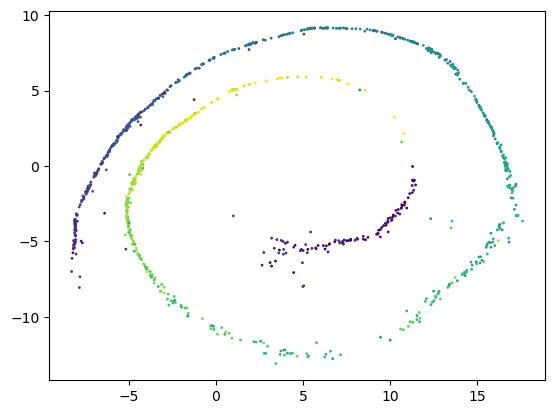

In [135]:
inds = np.argwhere((labels_test == 7))

plt.scatter(z_b[inds, 0], z_b[inds, 1], c=angles_test[inds],s=1)

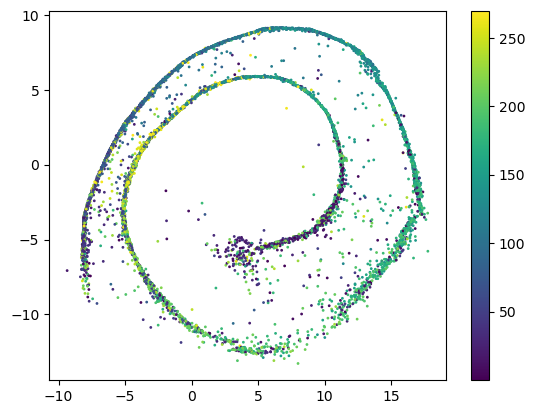

In [136]:
inds = np.argwhere((angles_test < 270))

plt.scatter(z_b[inds, 0], z_b[inds, 1], c=angles_test[inds],s=1);
plt.colorbar()

In [105]:
forbidden = np.argwhere(angles_test> 300).flatten()
forbidden

array([   1,    7,   10, ..., 9974, 9980, 9988], dtype=int64)

In [106]:
sevens = np.argwhere(labels_test == 7).flatten()

In [107]:
angle = model.F_b(b_test[forbidden[2]])

In [108]:
shared = model.F_a2b(a_test[sevens[0]])

In [109]:
latents = torch.cat((angle, shared))
recon = model.G_b(latents)

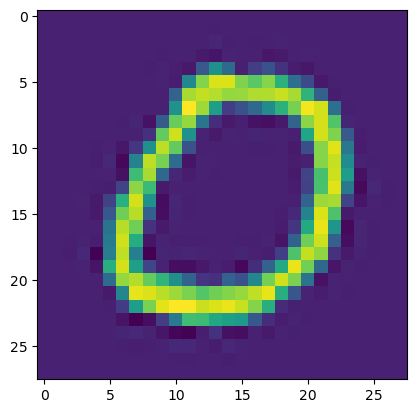

In [78]:
plt.imshow(b_test[forbidden[2]].detach().cpu().numpy().reshape(28,28))

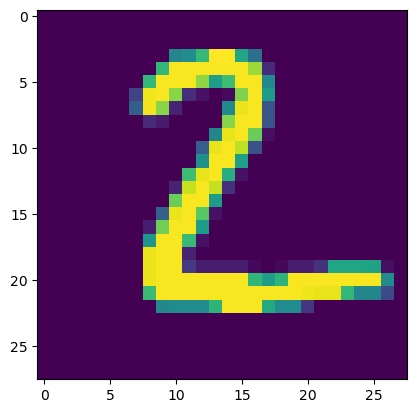

In [79]:
plt.imshow(a_test[forbidden[0]].detach().cpu().numpy().reshape(28,28))

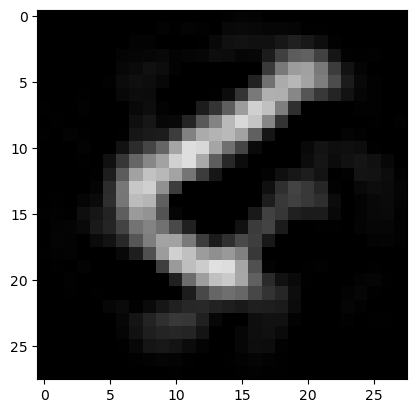

In [80]:
plt.imshow(recon.detach().cpu().numpy().reshape(28,28), cmap="gray", vmin=0, vmax=1)

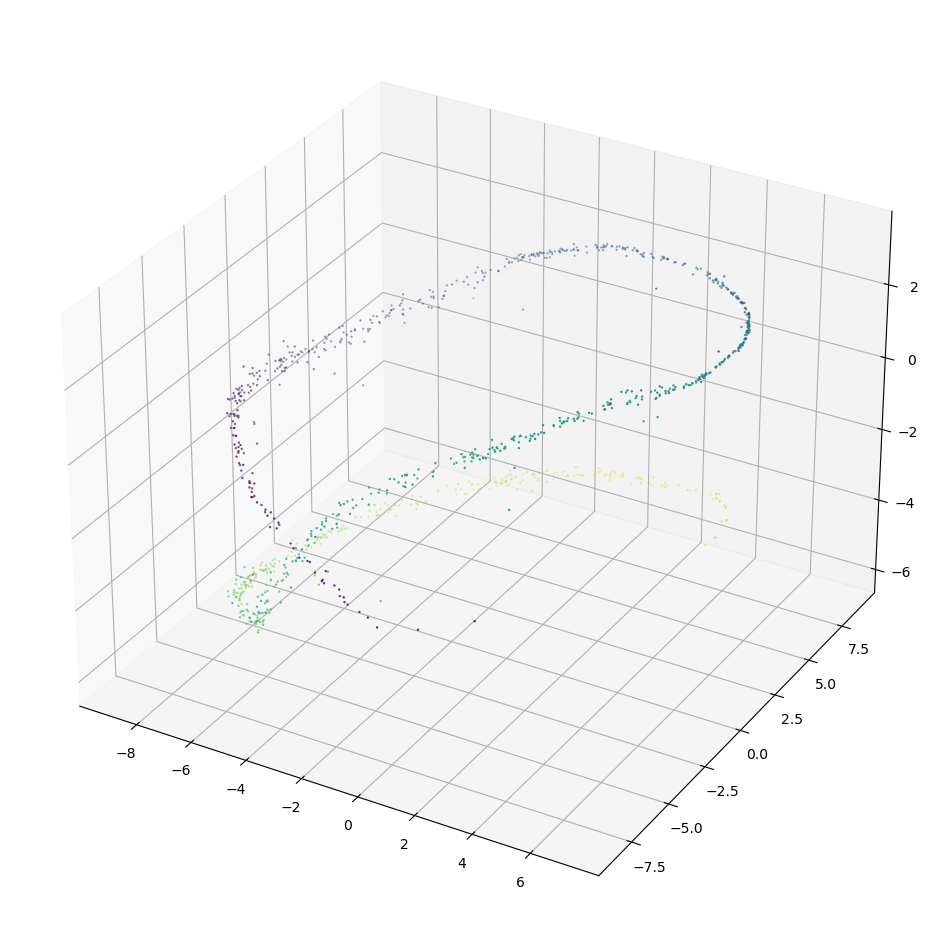

In [79]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

ax.scatter(z_b[inds,0], z_b[inds,1], z_b[inds,2], c=angles_test[inds], s=0.5)

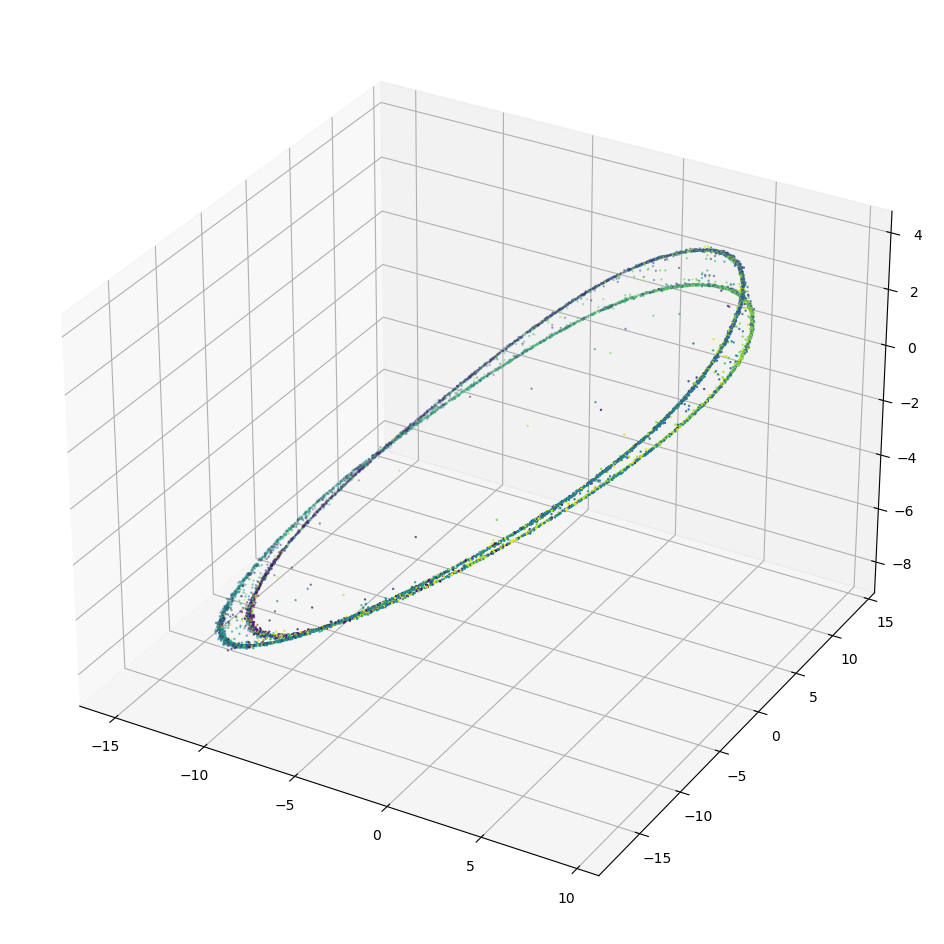

In [15]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

ax.scatter(z_b[:,0], z_b[:,1], z_b[:,2], c=angles_test, s=0.5)

In [46]:
model = SPLICE(
        n_a=784,
        n_b=784,
        n_shared=30,
        n_private_a=0,
        n_private_b=3,
        enc_layers=[256, 128, 64, 64],
        dec_layers=[64, 64, 128, 256],
        msr_layers=[64, 64, 128, 256],
    ).to(device)

In [127]:
isomap1_filepath = os.path.join(
        "..",
        "results",
        "models",
        "mnist",
        "splice_isomap_mnist_missing-rotations-fix3.pt",
    )
model.load_state_dict(torch.load(isomap1_filepath))

<All keys matched successfully>

In [128]:
z_a, z_b2a, z_a2b, z_b, m_a2b, m_b2a, a_hat, b_hat = model(a_test, b_test)
z_b = z_b.detach().cpu().numpy()

In [129]:
torch.nn.functional.mse_loss(b_test, b_hat)

tensor(1.5413, device='cuda:0', grad_fn=<MseLossBackward0>)

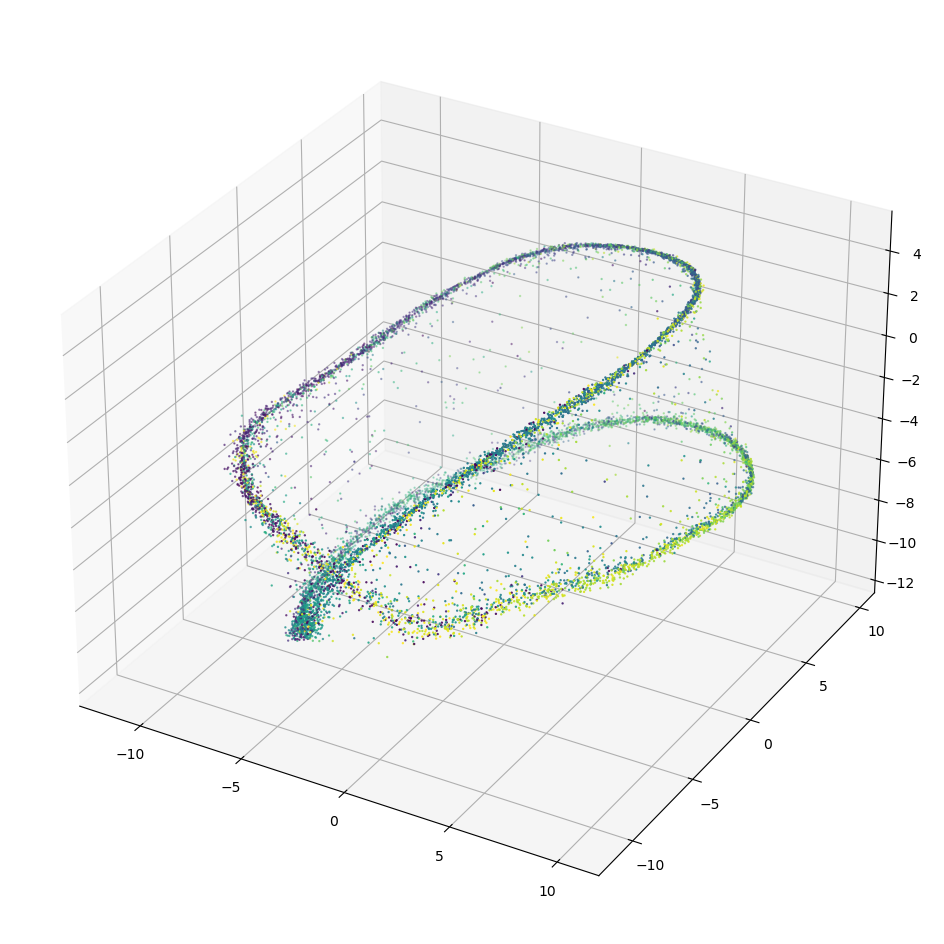

In [130]:
inds = np.arange(z_b.shape[0])

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

ax.scatter(z_b[inds,0], z_b[inds,1], z_b[inds,2], c=angles_test[inds], s=0.5)

In [74]:
isomap2_filepath = os.path.join(
    
        "..",
        "results",
        "models",
        "mnist",
        "splice_isomap_mnist_missing-rotations-fix7.pt",
    )
model.load_state_dict(torch.load(isomap2_filepath))

<All keys matched successfully>

In [75]:
z_a, z_b2a, z_a2b, z_b, m_a2b, m_b2a, a_hat, b_hat = model(a_test, b_test)
z_b = z_b.detach().cpu().numpy()

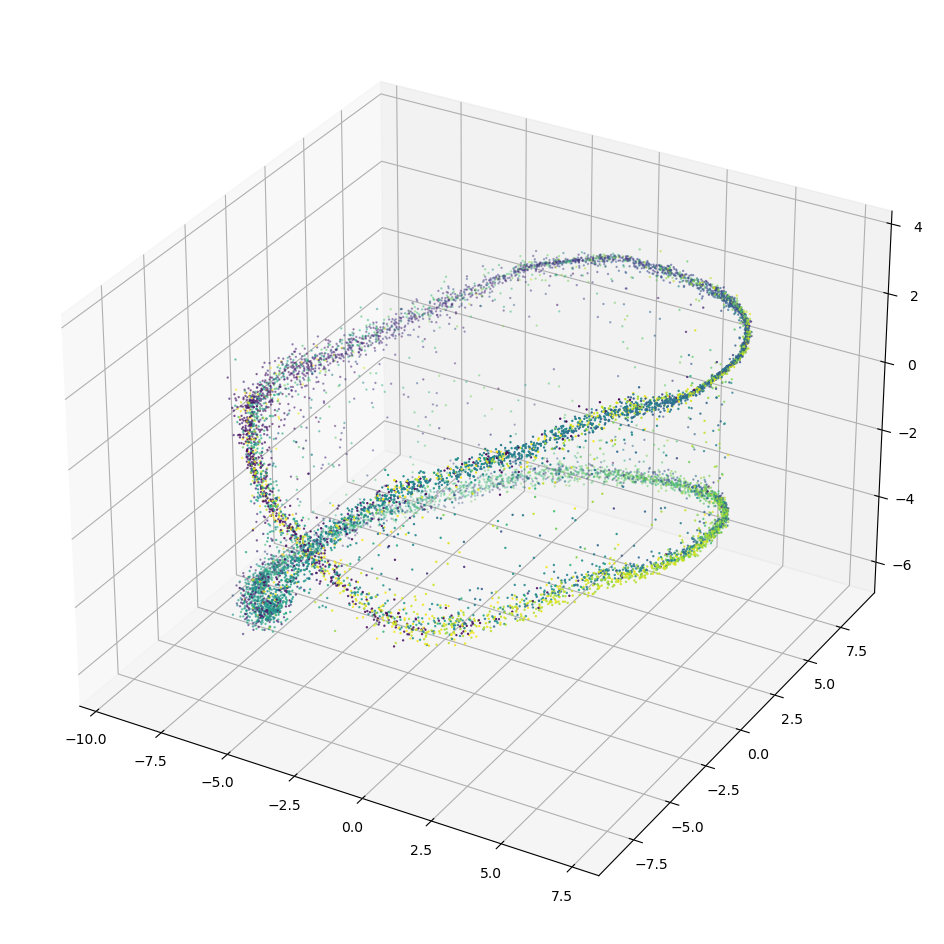

In [76]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

ax.scatter(z_b[inds,0], z_b[inds,1], z_b[inds,2], c=angles_test[inds], s=0.5)